## Programming for Data Analysis Project Submission 2018

### Foreword
The investigation and synthesis of data contained in this Jupyter Notebook is the project submission for the 2nd semester 10 credit module - **Programming for Data Analysis**, part of the course entitled *Higher Diploma in Science - Computing(Data Analytics)*, submitted to Dr. Ian McLoughlin, Lecturer and Programme Director at GMIT.

Submitted by Justin Rutherford<br>
December 2018.

### Project Requirements;

*Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.*<br>
*1. Investigate the types of variables involved, their likely distributions, and their relationships with each other.*<br>
*2. Synthesise/simulate a data set as closely matching their properties as possible.*<br>
*3. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.*



### Work Plan

1. Decide on the real world phenomenon to be simulated and access a publically available dataset. 
2. Review the dataset and extract the relevant data for further investigation.
3. Establish a baseline set of parameters for which we will then simulate data relecting closely the statistics of the real data.
4. Conduct on-line research to establish the various probability distributions used to simulate similar datasets.
5. Using the relevant Numpy Random distribution function we simulate datasets based on the statistics obtained.

### Summary Results and Commentary



In [1]:
import pandas as pd

# Read in the csv file and select the columns we are interested in;
df = pd.read_csv("http://cli.met.ie/cli/climate_data/webdata/dly375.csv", skiprows=24, low_memory=False, usecols=[0,8,10,14,17,23])

# KEYS - rain - in mm, msl = mean sea level pressure (hPa), wdsp = windspeed (knot), ddhm = Wind direction (degree), soil = soil temperature deg C, glorad = Global radiation (j/cm sq.)

In [2]:
df.tail()

,date,rain,wdsp,ddhm,soil,glorad
5459,27-oct-2018,0.0,8.4,350,6.496,815
5460,28-oct-2018,0.0,5.6,0,5.503,853
5461,29-oct-2018,0.0,3.8,140,4.914,441
5462,30-oct-2018,1.7,3.7,190,5.854,727
5463,31-oct-2018,1.4,3.7,230,7.057,278


In [3]:
df['Datetime']= pd.to_datetime(df['date'])

In [4]:
df.head()

,date,rain,wdsp,ddhm,soil,glorad,Datetime
0,13-aug-2003,,,250,,,2003-08-13
1,14-aug-2003,0.0,4.3,20,,,2003-08-14
2,15-aug-2003,0.0,3.3,0,,,2003-08-15
3,16-aug-2003,0.0,3.4,130,,,2003-08-16
4,17-aug-2003,1.5,6.4,160,,,2003-08-17


In [5]:
#To rearrange the dataframe to have the datetime column first we call it as follows
df = df[['Datetime', 'rain', 'wdsp', 'ddhm', 'soil', 'glorad']]
df.tail()

,Datetime,rain,wdsp,ddhm,soil,glorad
5459,2018-10-27,0.0,8.4,350,6.496,815
5460,2018-10-28,0.0,5.6,0,5.503,853
5461,2018-10-29,0.0,3.8,140,4.914,441
5462,2018-10-30,1.7,3.7,190,5.854,727
5463,2018-10-31,1.4,3.7,230,7.057,278


In [6]:
df = df.set_index('Datetime')
df.tail()

,rain,wdsp,ddhm,soil,glorad
Datetime,,,,,
2018-10-27,0.0,8.4,350,6.496,815
2018-10-28,0.0,5.6,0,5.503,853
2018-10-29,0.0,3.8,140,4.914,441
2018-10-30,1.7,3.7,190,5.854,727
2018-10-31,1.4,3.7,230,7.057,278


In [7]:
df1 = df.iloc[4798:5160]
df1.head()

,rain,wdsp,ddhm,soil,glorad
Datetime,,,,,
2017-01-01,1.4,9.5,0,4.453,365
2017-01-02,0.1,4.9,350,1.933,369
2017-01-03,0.0,4.4,270,1.764,124
2017-01-04,0.1,3.8,280,4.232,115
2017-01-05,0.0,5.7,160,4.497,122


In [8]:
df1.tail()


,rain,wdsp,ddhm,soil,glorad
Datetime,,,,,
2017-12-27,0.0,8.4,310,2.137,369
2017-12-28,0.0,3.6,280,1.178,243
2017-12-29,13.9,12.0,240,3.191,300
2017-12-30,3.3,13.8,250,5.819,167
2017-12-31,2.1,13.1,220,5.152,164


In [9]:
df1.describe()

,ddhm
count,362.000000
mean,216.602210
std,74.225842
min,0.000000
25%,170.000000
50%,220.000000
75%,270.000000
max,350.000000


In [10]:
#Let's look at the data types we are working with.
df1.dtypes

rain      object
wdsp      object
ddhm       int64
soil      object
glorad    object
dtype: object

In [11]:
df1 = df1.apply(pd.to_numeric, errors = 'coerce')

In [12]:
df1.dtypes

rain      float64
wdsp      float64
ddhm        int64
soil      float64
glorad      int64
dtype: object

In [13]:
df1.head()

,rain,wdsp,ddhm,soil,glorad
Datetime,,,,,
2017-01-01,1.4,9.5,0,4.453,365
2017-01-02,0.1,4.9,350,1.933,369
2017-01-03,0.0,4.4,270,1.764,124
2017-01-04,0.1,3.8,280,4.232,115
2017-01-05,0.0,5.7,160,4.497,122


In [14]:
df1.columns = ['Rainfall','Windspeed','Wind Direction', 'Soil Temp', 'Solar Radiation']

In [15]:
#So now we should have some reference data to use as a guide in generating some random numbers!
Ref_data = df1.describe()
Ref_data

,Rainfall,Windspeed,Wind Direction,Soil Temp,Solar Radiation
count,362.000000,362.000000,362.000000,362.000000,362.000000
mean,2.070994,7.366575,216.602210,11.473392,946.955801
std,4.000466,3.087588,74.225842,5.192958,716.053630
min,0.000000,1.700000,0.000000,0.862000,42.000000
25%,0.000000,5.025000,170.000000,7.372000,322.250000
50%,0.300000,7.150000,220.000000,11.424500,759.500000
75%,2.300000,9.275000,270.000000,16.021500,1498.750000
max,28.200000,20.400000,350.000000,23.930000,3028.000000


In [16]:

df1.iloc[:,0].mode()

0    0.0
dtype: float64

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Having read the paper on 'PDF of rainrate and estimation of rainfall' (as referenced in the footer), we will use the Gumbel distribution function;  
# First however we need to determine the location of the 'mode' value for the Gumbel distribution.

#We do this by applying the function
df1.iloc[:,0].mode()

0    0.0
dtype: float64

In [18]:
#We know the location fo the mode and the shape, and the days per year
Rain = np.random.gumbel(0.0,2,365)

Text(0.5,1,'Histogram of Rainfall for 2017')

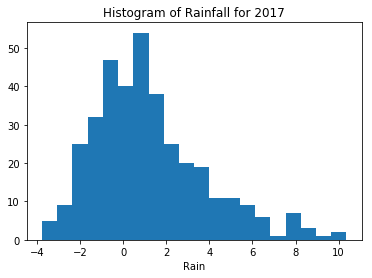

In [19]:
# Let's increase the number of bins to give us a more accurate reflection of the sampling fequency;
plt.hist(Rain, 20)
plt.xlabel('Rainfall')
plt.title('Histogram of Rainfall for 2017')

In [20]:
#Now let's look at the statistics of the number array (ref = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html)
from scipy import stats
stats.describe(Rain)

DescribeResult(nobs=365, minmax=(-3.760332224863412, 10.359702101914289), mean=1.2176589503485697, variance=6.851508545376815, skewness=0.9107880510198069, kurtosis=0.7473806895947095)

In [21]:
#Having read the paper on "Matching Temperature Data to a Normal Distribution" we will now deploy a random normal distribution
#generate comparable data to the target dataset.

In [22]:
Soil_Temp = np.random.normal(11.47, 5.19, 362)

In [23]:
Soil_Temp.max()

26.314884684713057

In [24]:
Soil_Temp.min()

-1.864567608240419

In [25]:
Soil_Temp.mean()

11.068295359944491

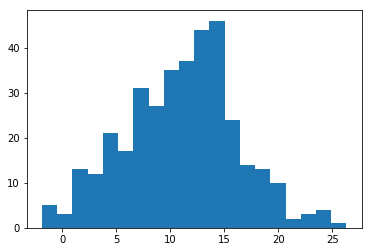

In [26]:
count, bins, ignored = plt.hist(Soil_Temp,20)

In [27]:
stats.describe(Soil_Temp)

DescribeResult(nobs=362, minmax=(-1.864567608240419, 26.314884684713057), mean=11.068295359944491, variance=27.157999760027923, skewness=-0.01897697491978325, kurtosis=-0.11360252349317923)

### Mean Sea Level Pressure (hPa)
Having read the paper *"Statistical Properties of the Atmospheric Pressure Field over the Artic Ocean"*<sup>[Ref](https://journals.ametsoc.org/doi/pdf/10.1175/1520-0469%281982%29039%3C2229%3ASPOTAP%3E2.0.CO%3B2)</sup>, we will employ a normal distribution to generate random pressure variables.

In [28]:
MSL = np.random.normal(1013.5, 13.22, 8760)
MSL

array([ 998.18335425,  992.05821657, 1000.02696738, ..., 1015.97831271,
       1001.83598107, 1031.8717768 ])

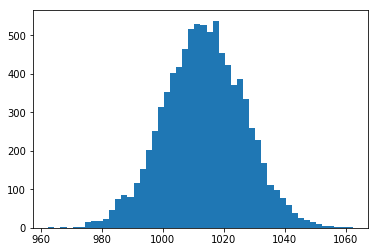

In [29]:
count, bins, ignored = plt.hist(MSL, 50,)

In [30]:
stats.describe(MSL)

DescribeResult(nobs=8760, minmax=(962.4611110792797, 1062.2522466276992), mean=1013.4565104245365, variance=174.62937293273222, skewness=-0.017456591538523063, kurtosis=0.017346294569154708)

### Wind Speed (WdSp) in knots
Having read the following paper *"Analytical study of different probability distributions for wind speed related to power statistics"*<sup>[Ref](https://ieeexplore.ieee.org/document/5211970)</sup>, we elected to use a wald distribution function in generating random varialbes for wind speed.

In [31]:
WdSp = np.random.wald(9.65,5.27, 8760)
WdSp

array([23.51113455,  4.29726785,  1.92482841, ..., 26.60783217,
        4.85439355, 33.14576013])

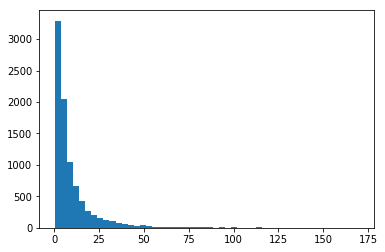

In [32]:
count, bins, ignored = plt.hist(WdSp, 50)

In [33]:
stats.describe(WdSp)

DescribeResult(nobs=8760, minmax=(0.3432201064571192, 169.86733125354007), mean=9.78593362161723, variance=176.41272872542254, skewness=3.8056461105552857, kurtosis=21.16076135207586)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


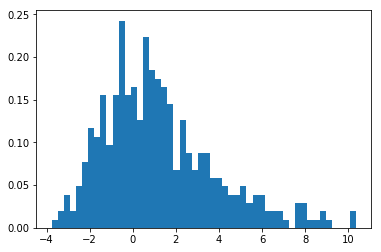

In [34]:
count, bins, ignored = plt.hist(Rain, 50, normed=True, align='mid')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


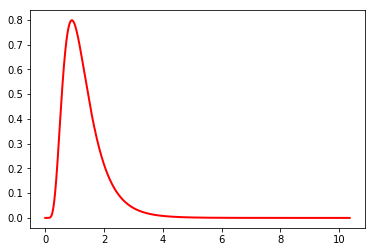

In [35]:
mu=0.14
sigma = 0.49

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

In [36]:
df.max()

rain        9.900
wdsp        9.900
ddhm      360.000
soil        9.995
glorad    999.000
dtype: float64

In [37]:
df.min()

rain       
wdsp       
ddhm      0
soil       
glorad     
dtype: object

In [38]:
df.std()

ddhm    84.467797
dtype: float64

In [39]:
df.iloc[:,2].mean()

207.6281112737921

[The Probability Density Function of Rain Rate and the Estimation of Rainfall by Area Integrals](https://journals.ametsoc.org/doi/10.1175/1520-0450%281994%29033%3C1255%3ATPDFOR%3E2.0.CO%3B2)

[SIMULATING MAXIMUM AND MINIMUM DAILY TEMPERATURE
WITH THE NORMAL DISTRIBUTION](https://naldc.nal.usda.gov/download/27264/PDF)

[Matching Temperature Data to a Normal Distribution](http://demonstrations.wolfram.com/MatchingTemperatureDataToANormalDistribution/)



[Statistical Properties of the Atmospheric Pressure Field over the Artic Ocean](https://journals.ametsoc.org/doi/pdf/10.1175/1520-0469%281982%29039%3C2229%3ASPOTAP%3E2.0.CO%3B2)

[Probability distributions for offshore wind speeds](https://engineering.tufts.edu/cee/people/vogel/documents/probabilityDistributionsOffshoreWindSpeeds.pdf)

[Analytical study of different probability distributions for wind speed related to power statistics](https://ieeexplore.ieee.org/document/5211970)